Accuracy: 0.60
Confusion Matrix:
[[2 2]
 [0 1]]
Weights: [[0.01009636 0.01414089]]
Bias: [0.]
New Applicant 1: Exam1=85, Exam2=80 -> Admitted
New Applicant 2: Exam1=50, Exam2=45 -> Not Admitted
New Applicant 3: Exam1=70, Exam2=68 -> Admitted


C:\Users\HP\AppData\Local\Temp\ipykernel_11752\1070319776.py:68: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1],
C:\Users\HP\AppData\Local\Temp\ipykernel_11752\1070319776.py:72: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1],


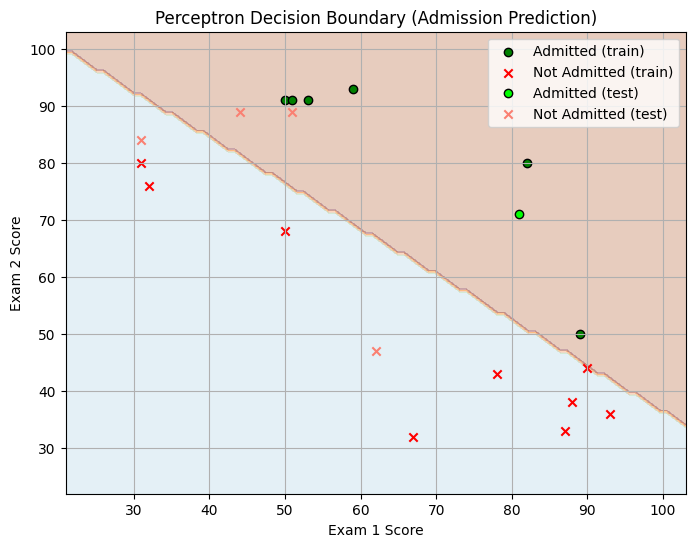

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix

# --- 1. Generate synthetic admission data ---
np.random.seed(42)
n_samples = 20
exam1 = np.random.randint(30, 100, n_samples)
exam2 = np.random.randint(30, 100, n_samples)
total = exam1 + exam2
y = (total > 140).astype(int)
# Add a little noise
noise_idx = np.random.choice(n_samples, size=int(0.05*n_samples), replace=False)
y[noise_idx] = 1 - y[noise_idx]

data = pd.DataFrame({'Exam1': exam1, 'Exam2': exam2, 'Admitted': y})

# --- 2. Split and scale ---
X = data[['Exam1', 'Exam2']].values
y = data['Admitted'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 3. Train scikit-learn Perceptron ---
perceptron = Perceptron(eta0=0.01, max_iter=20, random_state=42)
perceptron.fit(X_train_scaled, y_train)

# --- 4. Predict and evaluate ---
y_pred = perceptron.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Weights:", perceptron.coef_)
print("Bias:", perceptron.intercept_)

# --- 5. Predict new applicants ---
new_apps = np.array([[85, 80], [50, 45], [70, 68]])
new_scaled = scaler.transform(new_apps)
new_pred = perceptron.predict(new_scaled)
for i, (e1, e2) in enumerate(new_apps):
    status = "Admitted" if new_pred[i] == 1 else "Not Admitted"
    print(f"New Applicant {i+1}: Exam1={e1}, Exam2={e2} -> {status}")

# --- 6. Plot decision boundary (optional) ---
w = perceptron.coef_[0]
b = perceptron.intercept_[0]
x_min, x_max = X_train[:, 0].min() - 10, X_train[:, 0].max() + 10
y_min, y_max = X_train[:, 1].min() - 10, X_train[:, 1].max() + 10
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_scaled = scaler.transform(mesh_points)
Z = perceptron.predict(mesh_scaled)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], 
            color='green', edgecolors='k', marker='o', label='Admitted (train)')
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], 
            color='red', edgecolors='k', marker='x', label='Not Admitted (train)')
plt.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1], 
            color='lime', edgecolors='k', marker='o', label='Admitted (test)')
plt.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1], 
            color='salmon', edgecolors='k', marker='x', label='Not Admitted (test)')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.title('Perceptron Decision Boundary (Admission Prediction)')
plt.legend()
plt.grid(True)
plt.show()